In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
np.random.seed(42)

In [134]:
def data_with_mask(x, width_window=10, x_margin=0, y_margin=0):
    assert width_window > 0 and width_window < 20, 'width_window should be integer from range [1, 20]' 
    masks = np.ones_like(x)
    for i in range(x.shape[0]):
        xi = np.random.randint(x_margin, 28 - width_window - x_margin)
        yi = np.random.randint(y_margin, 28 - width_window - y_margin)
        mask = np.ix_([i], np.arange(yi, yi+ width_window), np.arange(xi, xi+ width_window))
#         print(mask)
#         print(masks)
        masks[mask] = None
    return masks

In [135]:
# X_full = np.loadtxt("missing_mnist\mnist.txt", delimiter=",")
# X_missing = np.loadtxt("missing_mnist\missing_mnist.txt", delimiter=",")
# y = np.loadtxt("missing_mnist\labels_mnist.txt", delimiter=",")

In [145]:
# from keras.datasets import mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# X = x_train 
# y = y_train

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = mnist.train.images # Returns np.array
y = np.asarray(y, dtype=np.int32)
X = X/255.

In [146]:
x=X.reshape(-1,28,28)
width_window = 8
print('Original size of image: {}'.format(x.shape))
masks = data_with_mask(x, width_window=width_window, x_margin=5, y_margin=0)
x_masked = x * masks
print('Size image with mask 10 x 10: {}'.format(x_masked.shape))
X_missing = x_masked.reshape(-1,784)

Original size of image: (70000, 28, 28)
Size image with mask 10 x 10: (70000, 28, 28)


In [147]:
y = (y == 5)

In [148]:
X.shape

(70000, 784)

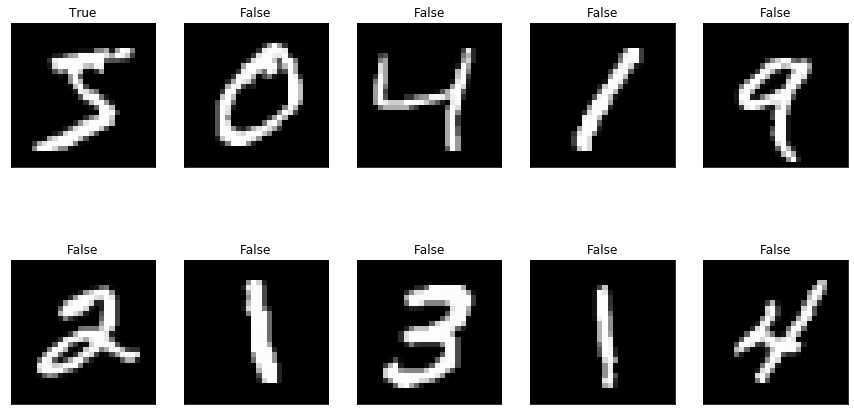

In [149]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

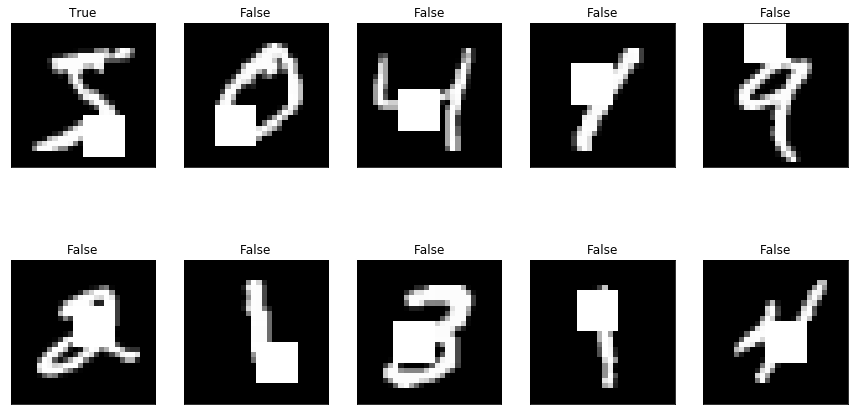

In [150]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X_missing, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [151]:
X_missing[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Zad. 

Naucz **LinearSVC** na danych bez braków


In [1]:
from sklearn.svm import LinearSVC


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

      False       0.98      0.99      0.99     50013
       True       0.91      0.81      0.86      4987

avg / total       0.98      0.98      0.98     55000



# Zad.

Wypełij braki w danych. Urzyj różnych strategii:
    
* mean
* median
* most_frequent

In [3]:
from sklearn.preprocessing import Imputer


# Zad. 

Naucz **LinearSVC** na danych z wypełnionymi brakami.